# *HOUSE PRICE PREDICTION FROM AIRBNB DATASET*


---



## LET'S IMPORT THE ALL LIBRARIES THAT ARE NEEDED

In [103]:
import numpy as np
from numpy import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import r2_score,mean_squared_error

import warnings
warnings.filterwarnings('ignore')


# IT IS TIME TO READ THE CSV FILE

In [158]:
dataset=pd.read_csv('listings_summary.csv')
# trying to print the no.ofrows and columns
print(f" No_of_rows={dataset.shape[0]} \n No_of_columns={dataset.shape[1]}")

 No_of_rows=22552 
 No_of_columns=76


### SINCE I HAVE SO MANY NO.OF ROWS AND COLUMNS IT IS IMPOSSIBLE TO PRINT ALL THE COLUMNS ,TO PREVENT THAT WE SET OPTIONS AS SHOWN BELOW


In [105]:
# Set the options to display maximum rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

#### NOW WE CAN SEE ALL COLUMNS

In [106]:
dataset.head(2)

,id,scrape_id,last_scraped,experiences_offered,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2015,2.018110e+13,43411,none,2217,Ian,18-08-2008,"Key Biscayne, Florida, United States",within an hour,0.96,NaN,t,Mitte,4.0,4.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Berlin, Berlin, Germany",Mitte,Brunnenstr. Süd,Mitte,Berlin,Berlin,10119,Berlin,"Berlin, Germany",DE,Germany,52.534537,13.402557,f,Guesthouse,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...",NaN,$60.00,NaN,NaN,$200.00,$30.00,1,$28.00,4,1125,3 months ago,t,0,21,51,141,43411,118,42471.0,43401.0,93.0,10.0,9.0,10.0,10.0,10.0,9.0,t,NaN,f,f,strict_14_with_grace_period,f,f,4,3.76
1,2695,2.018110e+13,43411,none,2986,Michael,16-09-2008,"Berlin, Berlin, Germany",NaN,NaN,NaN,f,Prenzlauer Berg,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Berlin, Berlin, Germany",NaN,Prenzlauer Berg Nordwest,Pankow,Berlin,Berlin,10437,Berlin,"Berlin, Germany",DE,Germany,52.548513,13.404553,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{Wifi,Kitchen,Elevator,Heating,Washer,Essentia...",NaN,$17.00,NaN,NaN,$0.00,$0.00,1,$0.00,2,40,7 weeks ago,t,0,0,0,0,43411,6,43285.0,43374.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,t,NaN,f,f,flexible,f,f,1,1.42


Let's check the information about the data file

In [107]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22552 entries, 0 to 22551
Data columns (total 76 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                22552 non-null  int64  
 1   scrape_id                         22552 non-null  float64
 2   last_scraped                      22552 non-null  int64  
 3   experiences_offered               22552 non-null  object 
 4   host_id                           22552 non-null  int64  
 5   host_name                         22526 non-null  object 
 6   host_since                        22526 non-null  object 
 7   host_location                     22436 non-null  object 
 8   host_response_time                9658 non-null   object 
 9   host_response_rate                9657 non-null   float64
 10  host_acceptance_rate              0 non-null      float64
 11  host_is_superhost                 22526 non-null  object 
 12  host

### neighbourhood_groups

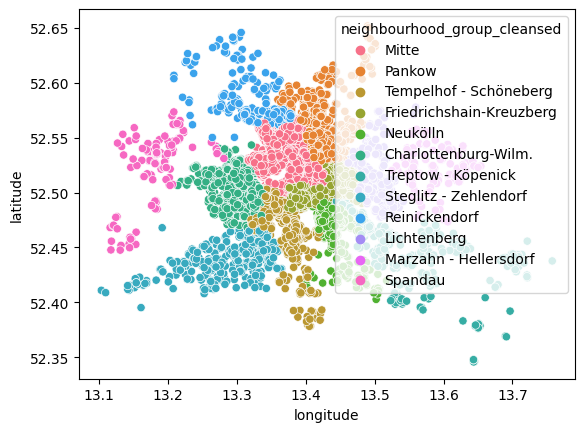

In [160]:
sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group_cleansed', data=dataset)
plt.ioff()

### WE HAVE 76 COLUMNS,TRY TO REMOVE FEW COLUMNS .
#### STEP-1: FIND THE MISSING  VALUE PERCENTAGE OF EACH COLUMN.
#### STEP2:REMOVE COLUMNS WHICH ARE HAVING MISSING PERCENTAGE MORE THAN 30%.

In [108]:
# Calculate the percentage of missing values in each column
null_percentage = (dataset.isnull().sum() / len(dataset)) * 100
#get all column names
all_cols=dataset.columns.tolist()

#visualizing  the missing percentage of each column in Dataset format
missing_percent_data=pd.DataFrame([all_cols,null_percentage])
missing_percent_data.T

,0,1
0,id,0.0
1,scrape_id,0.0
2,last_scraped,0.0
3,experiences_offered,0.0
4,host_id,0.0
5,host_name,0.115289
6,host_since,0.115289
7,host_location,0.514367
8,host_response_time,57.17453
9,host_response_rate,57.178964


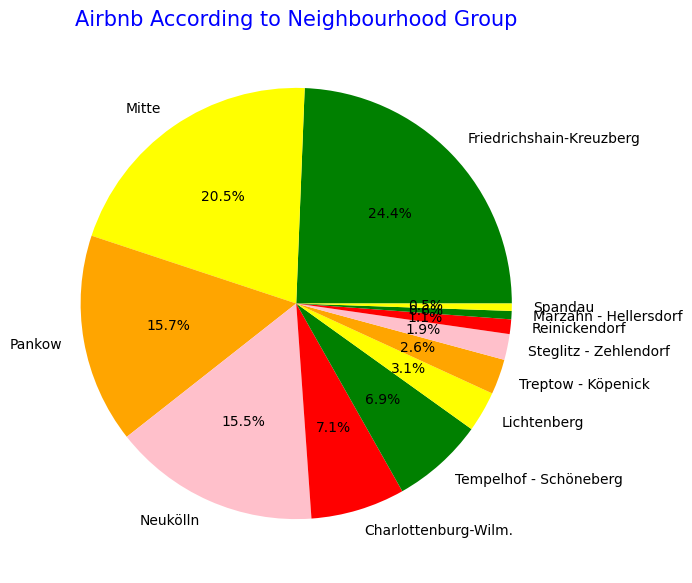

In [109]:
labels = dataset.neighbourhood_group_cleansed.value_counts().index
colors = ['green','yellow','orange','pink','red']
explode = [0,0,0,0,0]
sizes = dataset.neighbourhood_group_cleansed.value_counts().values

plt.figure(0,figsize = (7,7))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Airbnb According to Neighbourhood Group',color = 'blue',fontsize = 15)
plt.show()

### Step 2:

In [110]:
# Get the column names where the null percentage exceeds the threshold
columns_to_remove = null_percentage[null_percentage > 30].index.tolist()

# Remove the columns from the dataset
dataset = dataset.drop(columns=columns_to_remove)

# Verify the updated dataset
print(f"{dataset.shape[1]} left after deleting few columns ")

67 left after deleting few columns 


### Trying  to get the target and feature columns
#### according to the problem statement we know that we have to predict price so the price is our target column

In [111]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22552 entries, 0 to 22551
Data columns (total 67 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                22552 non-null  int64  
 1   scrape_id                         22552 non-null  float64
 2   last_scraped                      22552 non-null  int64  
 3   experiences_offered               22552 non-null  object 
 4   host_id                           22552 non-null  int64  
 5   host_name                         22526 non-null  object 
 6   host_since                        22526 non-null  object 
 7   host_location                     22436 non-null  object 
 8   host_is_superhost                 22526 non-null  object 
 9   host_neighbourhood                17458 non-null  object 
 10  host_listings_count               22526 non-null  float64
 11  host_total_listings_count         22526 non-null  float64
 12  host

## GENERALLY THE  HOUSE PRICE WILL BE DEPENDENT ON BELOW FETURES

#### HOST -  host_is_superhost
#### HOME DETAILS - property_type, room_type, accomodates, bathrooms, bedrooms, beds, bed_type, amenities
#### LISTING ELEMENTS - price, cleaning_fee, extra_people, minimum_nights, maximum_nights, instant_bookable, cancellation policy
#### OUTCOME VARIABLES-'review_scores_rating', 'review_scores_accuracy', review_scores_cleanliness', 'review_scores_checkin',

In [112]:
updated_dataset = dataset.loc[:,['host_is_superhost',
   'property_type', 'room_type',
    'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
    'amenities', 'price', 'minimum_nights',
    'maximum_nights', 'instant_bookable',
    'cancellation_policy', 'review_scores_rating', 'review_scores_accuracy',
    'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication',
    'review_scores_location', 'review_scores_value']]

In [113]:
updated_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22552 entries, 0 to 22551
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_is_superhost            22526 non-null  object 
 1   property_type                22552 non-null  object 
 2   room_type                    22552 non-null  object 
 3   accommodates                 22552 non-null  int64  
 4   bathrooms                    22520 non-null  float64
 5   bedrooms                     22534 non-null  float64
 6   beds                         22512 non-null  float64
 7   bed_type                     22552 non-null  object 
 8   amenities                    22552 non-null  object 
 9   price                        22552 non-null  object 
 10  minimum_nights               22552 non-null  int64  
 11  maximum_nights               22552 non-null  int64  
 12  instant_bookable             22552 non-null  object 
 13  cancellation_pol

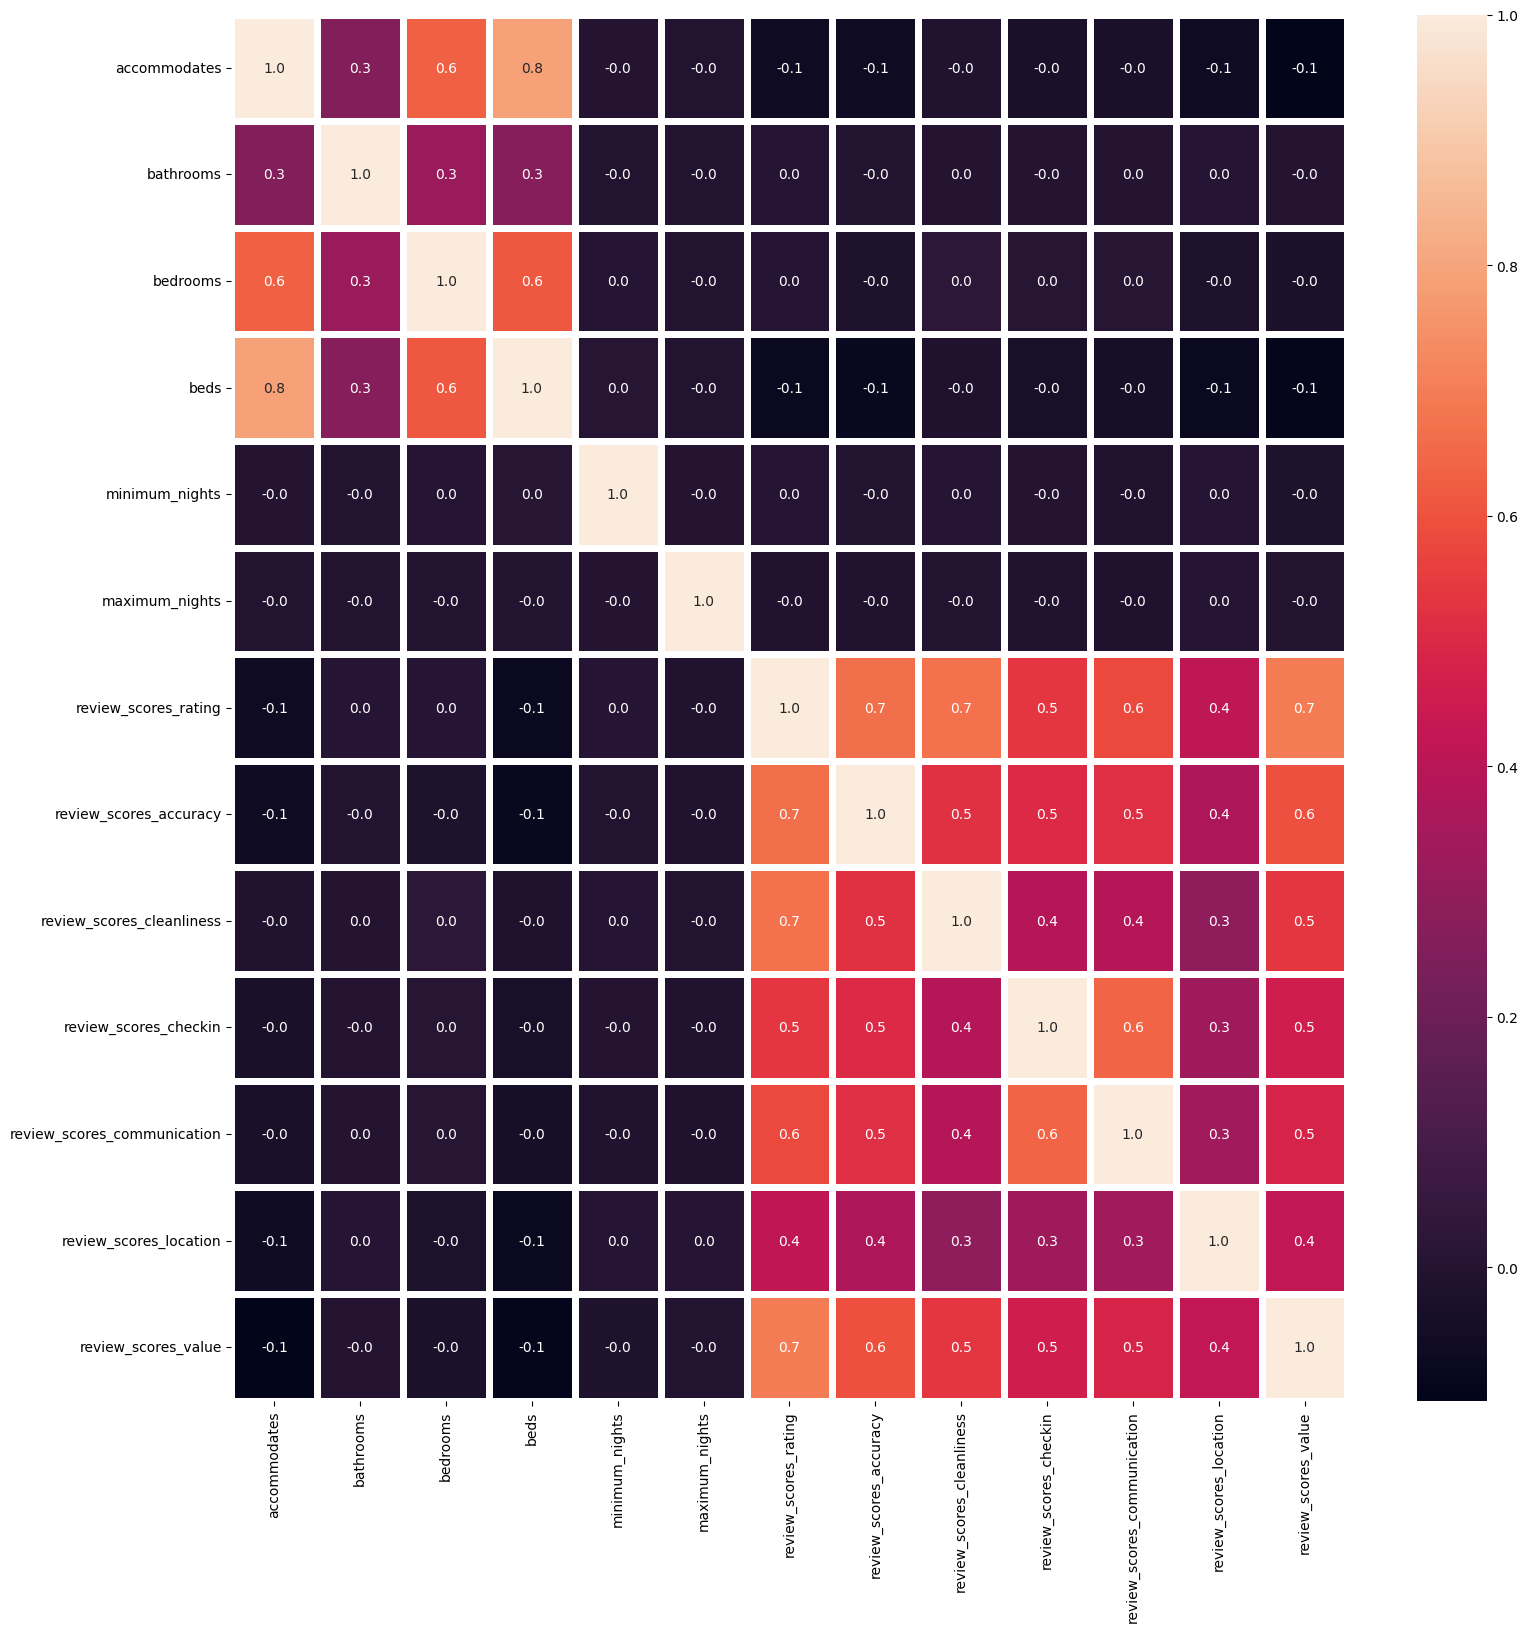

In [114]:
f,ax=plt.subplots(figsize=(18,18))
sns.heatmap(updated_dataset.corr(),annot=True,linewidths=5,fmt='.1f',ax=ax)
plt.show()

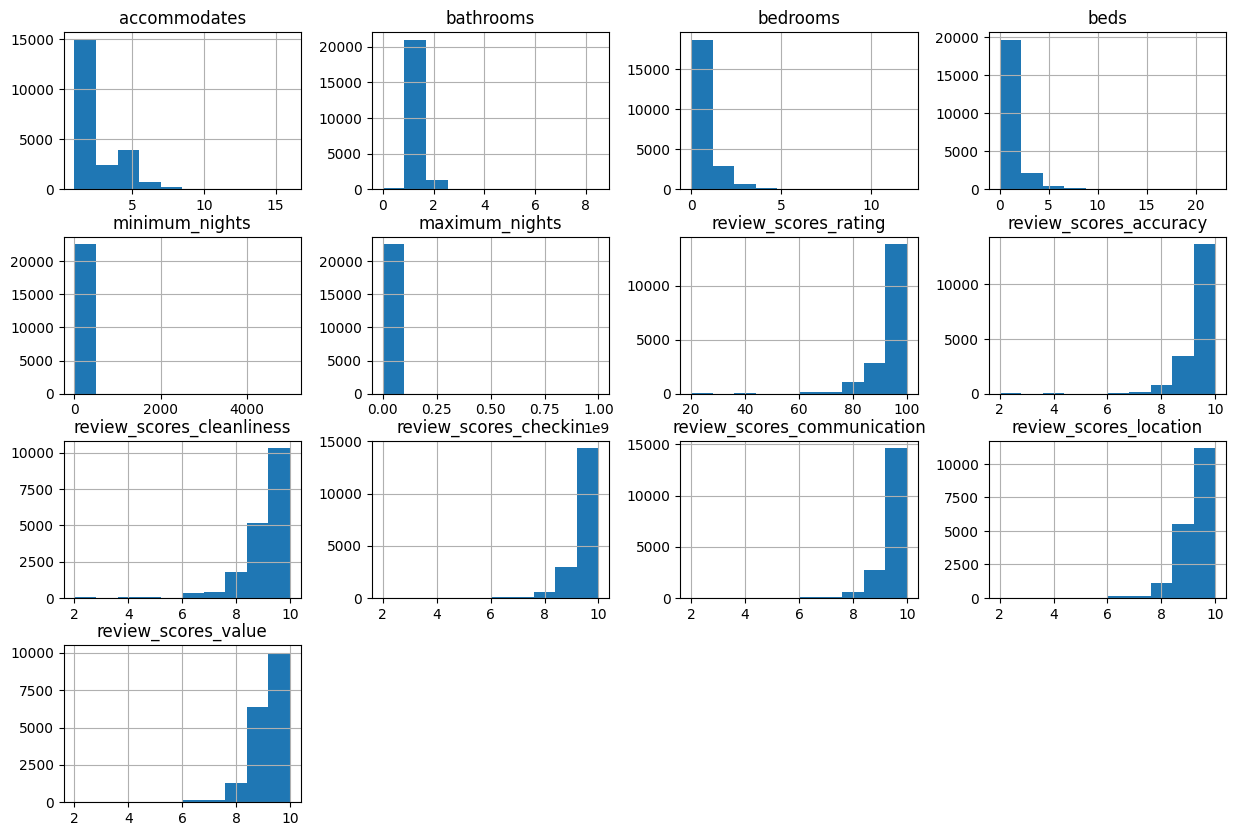

In [115]:
fig = plt.figure(figsize = (15,10))
ax = fig.gca()
updated_dataset.hist(ax=ax)
plt.show()

### Now it's time for preprocessing the data
### 1.Converting object type into integer type
### 2.Label encoding for categorical value
### 3.Feature Scaling

#### 'amenities': it refers no.of gadgets the house is providing
#### But unfortunatley the system doesn't understand the natural language so lets convert it into length so the more length the more gadgets

In [116]:
updated_dataset.loc[0:1,'amenities']

0    {TV,"Cable TV",Wifi,Kitchen,Gym,Heating,"Famil...
1    {Wifi,Kitchen,Elevator,Heating,Washer,Essentia...
Name: amenities, dtype: object

In [117]:
#Get length of home-detail element
updated_dataset.loc[:,'amenities_length'] = updated_dataset['amenities'].str.len()


In [118]:
#Drop original home-detail variables
updated_dataset = updated_dataset.drop('amenities',axis=1)

In [119]:
updated_dataset.loc[0:1,'amenities_length']

0    407
1    120
Name: amenities_length, dtype: int64

#### let's check 'host_is_superhost','instant_bookable'

In [120]:
print(updated_dataset['host_is_superhost'].dtype)
print(updated_dataset['host_is_superhost'].value_counts())
print("")
print(updated_dataset['instant_bookable'].dtype)
print(updated_dataset['instant_bookable'].value_counts())



object
f    19515
t     3011
Name: host_is_superhost, dtype: int64

object
f    15518
t     7034
Name: instant_bookable, dtype: int64


So  'host_is_superhost' , 'instant_bookable' are is categorical variable let's do label_encoding

In [121]:
#Change f/t values to binary 0/1
updated_dataset['host_is_superhost'].replace('t',1, inplace=True)
updated_dataset['host_is_superhost'].replace('f',0, inplace=True)
updated_dataset['instant_bookable'].replace('t',1, inplace=True)
updated_dataset['instant_bookable'].replace('f',0, inplace=True)

In [122]:
print(updated_dataset['host_is_superhost'].dtype)
print(updated_dataset['host_is_superhost'].value_counts())
print("")
print(updated_dataset['instant_bookable'].dtype)
print(updated_dataset['instant_bookable'].value_counts())



float64
0.0    19515
1.0     3011
Name: host_is_superhost, dtype: int64

int64
0    15518
1     7034
Name: instant_bookable, dtype: int64


check the property_type column


In [123]:
updated_dataset['property_type'].value_counts()

Apartment                 20225
Condominium                 612
Loft                        460
House                       398
Serviced apartment          175
Hostel                      128
Townhouse                    99
Guest suite                  74
Bed and breakfast            64
Guesthouse                   57
Hotel                        50
Other                        47
Boutique hotel               43
Bungalow                     20
Boat                         17
Tiny house                   12
Houseboat                    11
Camper/RV                    11
Villa                        10
Aparthotel                    7
Pension (South Korea)         7
Cabin                         6
Cottage                       4
Resort                        3
Train                         2
Castle                        2
Casa particular (Cuba)        2
Chalet                        1
Island                        1
Tipi                          1
In-law                        1
Cave    

 we have different kinds of proporty type lets make round to 4 types.
The top 3 will be same and remaing will comes under 'other' category

In [124]:
#Clean property_type category to 5 categories
def recode(value):
    if value not in ['House', 'Apartment', 'Touwnhouse', 'Condominium']:
        return 'Other'
    return value

updated_dataset['property_type'] = updated_dataset['property_type'].apply(recode)

In [125]:
updated_dataset['property_type'].value_counts()

Apartment      20225
Other           1317
Condominium      612
House            398
Name: property_type, dtype: int64

check the bed_type

In [126]:
updated_dataset['bed_type'].value_counts()

Real Bed         21766
Pull-out Sofa      451
Futon              240
Couch               72
Airbed              23
Name: bed_type, dtype: int64

In [127]:
#Clean bed_type to binary real bed or other
def recode(value):
    if value not in ['Real Bed']:
        return 'Other'
    return value

updated_dataset['bed_type'] = updated_dataset['bed_type'].apply(recode)

In [128]:
updated_dataset['bed_type'].value_counts()

Real Bed    21766
Other         786
Name: bed_type, dtype: int64

Removing Bad characters and converting price into numeric type

In [129]:
updated_dataset['price'] = updated_dataset['price'].str.replace('$', '')
updated_dataset['price'] = updated_dataset['price'].str.replace(',', '').astype('float64')

Filling the misssing values for 'bathrooms','bedrooms','beds','host_is_super-host'.

In [130]:
#Can't be sure what a missing value for these so we'll fill na
updated_dataset['bathrooms'].fillna(method='ffill', inplace=True)
updated_dataset['bedrooms'].fillna(method='ffill', inplace=True)
updated_dataset['beds'].fillna(method='ffill', inplace=True)
updated_dataset['host_is_superhost'].fillna(method='ffill', inplace=True)

In [131]:
updated_dataset.dtypes

host_is_superhost              float64
property_type                   object
room_type                       object
accommodates                     int64
bathrooms                      float64
bedrooms                       float64
beds                           float64
bed_type                        object
price                          float64
minimum_nights                   int64
maximum_nights                   int64
instant_bookable                 int64
cancellation_policy             object
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value            float64
amenities_length                 int64
dtype: object

Label encoding the cancellation_policy column so that it can convert into int type .

Cancellation_policy has 5 unique values.check below

In [133]:
updated_dataset['cancellation_policy'].value_counts()

flexible                       9102
moderate                       7096
strict_14_with_grace_period    6287
super_strict_30                  53
super_strict_60                  14
Name: cancellation_policy, dtype: int64

In [134]:
cancellation_policy= ['flexible', 'moderate', 'strict_14_with_grace_period', 'super_strict_30', 'super_strict_60']

# Apply label encoding to the column
label_encoder = LabelEncoder()
updated_dataset['cancellation_policy_encoded'] = label_encoder.fit_transform(updated_dataset['cancellation_policy'])
updated_dataset.drop('cancellation_policy',axis=1,inplace=True)
# Print the updated values
updated_dataset['cancellation_policy_encoded'].value_counts()


0    9102
1    7096
2    6287
3      53
4      14
Name: cancellation_policy_encoded, dtype: int64

 Below are the object type and thier unique values let's apply ione-hot encoding

In [135]:
print(updated_dataset['room_type'].value_counts())
print("")
print(updated_dataset['property_type'].value_counts())
print(" ")
print(updated_dataset['bed_type'].value_counts())

Private room       11534
Entire home/apt    10722
Shared room          296
Name: room_type, dtype: int64

Apartment      20225
Other           1317
Condominium      612
House            398
Name: property_type, dtype: int64
 
Real Bed    21766
Other         786
Name: bed_type, dtype: int64


In [136]:
encoded_dataset = pd.get_dummies(updated_dataset[['bed_type', 'room_type', 'property_type']],drop_first=True)
updated_dataset=pd.concat([updated_dataset,encoded_dataset],axis=1)
updated_dataset.drop(['room_type','property_type','bed_type'],axis=1,inplace=True)

In [137]:
updated_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22552 entries, 0 to 22551
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_is_superhost            22552 non-null  float64
 1   accommodates                 22552 non-null  int64  
 2   bathrooms                    22552 non-null  float64
 3   bedrooms                     22552 non-null  float64
 4   beds                         22552 non-null  float64
 5   price                        22552 non-null  float64
 6   minimum_nights               22552 non-null  int64  
 7   maximum_nights               22552 non-null  int64  
 8   instant_bookable             22552 non-null  int64  
 9   review_scores_rating         18163 non-null  float64
 10  review_scores_accuracy       18138 non-null  float64
 11  review_scores_cleanliness    18141 non-null  float64
 12  review_scores_checkin        18120 non-null  float64
 13  review_scores_co

In [138]:
updated_dataset.isnull().sum()

host_is_superhost                 0
accommodates                      0
bathrooms                         0
bedrooms                          0
beds                              0
price                             0
minimum_nights                    0
maximum_nights                    0
instant_bookable                  0
review_scores_rating           4389
review_scores_accuracy         4414
review_scores_cleanliness      4411
review_scores_checkin          4432
review_scores_communication    4418
review_scores_location         4431
review_scores_value            4435
amenities_length                  0
cancellation_policy_encoded       0
bed_type_Real Bed                 0
room_type_Private room            0
room_type_Shared room             0
property_type_Condominium         0
property_type_House               0
property_type_Other               0
dtype: int64

In [139]:
# Calculate the mean,mode,median of the respective column
mean_value_rsa =updated_dataset['review_scores_accuracy'].mean()
mode_value_rvr = updated_dataset['review_scores_checkin'].mode()[0]
median_value_rvc =updated_dataset['review_scores_communication'].median()
mean_value_rvl = updated_dataset['review_scores_location'].mean()

# Fill null values with the mean value
updated_dataset['review_scores_rating'].fillna(method='ffill',inplace=True)
updated_dataset['review_scores_accuracy'].fillna(mean_value_rsa,inplace=True)
updated_dataset['review_scores_cleanliness'].fillna(method='bfill',inplace=True)
updated_dataset['review_scores_checkin'].fillna(mode_value_rvr,inplace=True)
updated_dataset['review_scores_communication'].fillna(median_value_rvc,inplace=True)
updated_dataset['review_scores_location'].fillna(mean_value_rvl,inplace=True)
updated_dataset['review_scores_value'].fillna(method='ffill',inplace=True)

In [140]:
updated_dataset.isnull().sum()

host_is_superhost                0
accommodates                     0
bathrooms                        0
bedrooms                         0
beds                             0
price                            0
minimum_nights                   0
maximum_nights                   0
instant_bookable                 0
review_scores_rating             0
review_scores_accuracy           0
review_scores_cleanliness      127
review_scores_checkin            0
review_scores_communication      0
review_scores_location           0
review_scores_value              0
amenities_length                 0
cancellation_policy_encoded      0
bed_type_Real Bed                0
room_type_Private room           0
room_type_Shared room            0
property_type_Condominium        0
property_type_House              0
property_type_Other              0
dtype: int64

In [141]:
updated_dataset['review_scores_cleanliness'].fillna(method='ffill',inplace=True)

In [142]:
updated_dataset['review_scores_cleanliness'].isnull().sum()

0

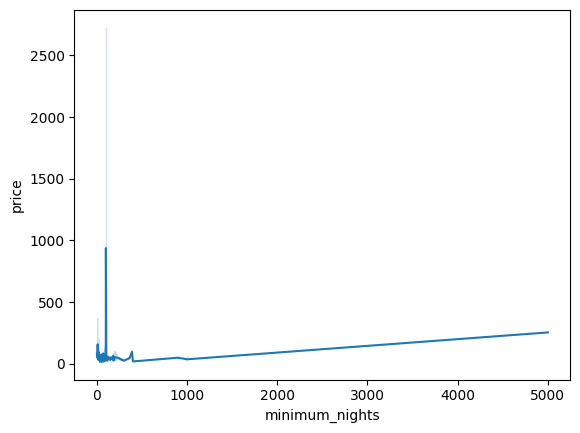

In [155]:
sns.lineplot(x='minimum_nights',y='price',data=updated_dataset)
plt.show()

### MODELING

In [143]:
x=updated_dataset.drop('price',axis=1)
y=updated_dataset['price']

In [144]:
scaler=MinMaxScaler()
y_scale=scaler.fit_transform(y.values.reshape(-1,1))


In [145]:
x_train,x_test,y_train,y_test=train_test_split(x,y_scale,test_size=0.2,random_state=0)

In [146]:
print('training_set_samples:',x_train.shape[0])
print('testing_set:_samples',x_test.shape[0])

training_set_samples: 18041
testing_set:_samples 4511


### LINEAR_REGRESSION_MODEL

In [147]:
lr_model=LinearRegression()
lr_model.fit(x_train,y_train)


LinearRegression()

In [148]:
y_test_pred=lr_model.predict(x_test)
print(mean_squared_error(y_test,y_test_pred))

0.001054247860193661


### DECISION TREE

In [149]:
dt_model=DecisionTreeRegressor()
dt_model.fit(x_train,y_train)

DecisionTreeRegressor()

In [164]:
y_test_pred=dt_model.predict(x_test)
print(mean_squared_error(y_test,y_test_pred))

0.0007045759797191381


### RANDOM_FOREST

In [151]:
rf_model = RandomForestRegressor()
rf_model.fit(x_train,y_train)


RandomForestRegressor()

In [165]:
y_test_pred=rf_model.predict(x_test)
print(mean_squared_error(y_test,y_test_pred))

0.0005882791457864324


### K_NEAREST_NEIGHBOUR

In [153]:
kn_model=KNeighborsRegressor(n_neighbors=5)
kn_model.fit(x_train,y_train)

KNeighborsRegressor()

In [166]:
y_test_pred=kn_model.predict(x_test)
print(mean_squared_error(y_test,y_test_pred))

0.0007317107927672001


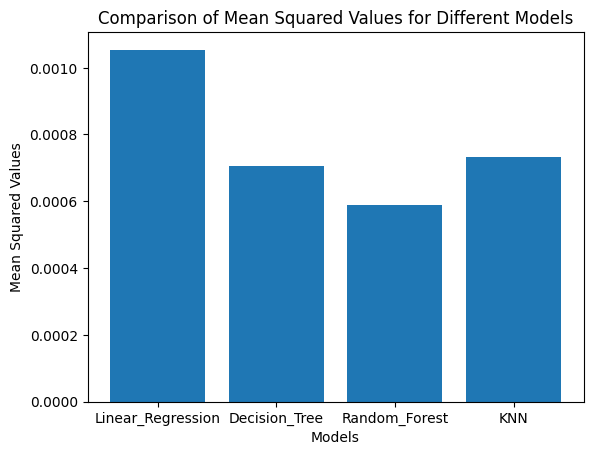

In [163]:
# Mean squared values for the four models
mean_squared_values = [0.001054247860193661,0.0007045759797191381,0.0005882791457864324, 0.0007317107927672001]

# Names of the models
model_names = ['Linear_Regression', 'Decision_Tree', 'Random_Forest', 'KNN']

# Create a bar plot
plt.bar(model_names, mean_squared_values)
plt.xlabel('Models')
plt.ylabel('Mean Squared Values')
plt.title('Comparison of Mean Squared Values for Different Models')
plt.show()